In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_excel('BioDeconProcessed_Original.xlsx', sheet_name = 'ProcessedData')

df.head()

,EntryDate,ENRec,Ref,PhysState,GrimeDirt,AppMeth,Loading,ContTimeDesc,LoadingUn,CoupArea,...,TotalApp,RHNumCheck,RHNum,DeconMethod,VolAppDen(L/m^2),ClO2(ppm),MB(mg/L),H2O2(ppm),PosCalc,LPosRecCalc
0,2017-11-07 00:00:00,10,"Brantner, 2014, Inactivation and ultrastructur...",liquid,NaN,suspension,8000000000,steady state conditions,CFU/mL,NaN,...,NaN,False,unlisted,unlisted,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-11-07 00:00:00,10,"Brantner, 2014, Inactivation and ultrastructur...",liquid,NaN,suspension,8000000000,steady state conditions,CFU/mL,NaN,...,NaN,False,unlisted,unlisted,NaN,NaN,NaN,NaN,3.0,NaN
2,2017-11-07 00:00:00,10,"Brantner, 2014, Inactivation and ultrastructur...",liquid,NaN,suspension,8000000000,steady state conditions,CFU/mL,NaN,...,NaN,False,unlisted,unlisted,NaN,NaN,NaN,NaN,0.0,NaN
3,2017-11-07 00:00:00,10,"Brantner, 2014, Inactivation and ultrastructur...",liquid,NaN,suspension,8000000000,steady state conditions,CFU/mL,NaN,...,NaN,False,unlisted,unlisted,NaN,NaN,NaN,NaN,0.0,NaN
4,2017-11-07 00:00:00,10,"Brantner, 2014, Inactivation and ultrastructur...",liquid,NaN,suspension,8000000000,steady state conditions,CFU/mL,NaN,...,NaN,False,unlisted,unlisted,NaN,NaN,NaN,NaN,0.0,NaN


In [3]:
df.LPosRec.unique()

array(['NR', nan, 7.10160427807486, 7.14772727272727, 5.66, 6.34, 7.1,
       6.9, 7.2, 7.3, 7.4, 4.66181268553726, 5.11394335230683,
       9.97312785359969, 9.4232458739368, 7, 7.7, 7.8, 6.1, 6.4, 6.3, 6.7,
       6.6, 6, 6.5, 6.2, 6.8, 6.55913959332062, 6.26566927449967,
       6.98011363636362, 6.90056818181817, 6.74233128834355,
       6.50613496932515, 6.67536231884056, 6.47246376811594,
       6.77606164324658, 6.30476771985344, 6.85545722713863, 6.14, 6.16,
       5.65, 6.07, 5.97, 5.42, 6.09, 5.44, 5.99, 6.05, 6.12, 5.81, 6.04,
       5.74, 6.08, 5.86, 5.88, 5.68, 5.6, 5.3, 5.9, 5.58, 5.92, 6.24,
       5.76, 'Not reported', 7.52267264621071, 7.40280178636377,
       7.43843906902097, 7.49030886394912, 7.19215034853591,
       7.52238805970149, 7.4456289978678, 7.42643923240938,
       7.21535181236673, 7.52830188679245, 7.41509433962264,
       7.49056603773585, 7.22641509433961, 7.57023841022713,
       7.42049743068417, 7.43594465874751, 7.4846676600426,
       7.1854050327

In [4]:
LPosRecStrings = ['0.5 LR', 'NR', 'Not reported', 'not reported']

for i in LPosRecStrings:
    df.loc[df.LPosRec == i] = -1

df['LPosRec'] = df.LPosRec.astype(float)

In [5]:
loadingStrings = ['unlisted', 'undefined']

for i in loadingStrings:
    df.loc[df.LoadingNum == i] = -1
    
df['LoadingNum'] = df.LoadingNum.astype(float)

In [6]:
lprEst = pd.DataFrame()

lprEst['Loading'] = df.LoadingNum
lprEst['LoadingUn'] = df.LoadingUn
lprEst['LPosRec'] = df.LPosRec

In [7]:
lprEst['ConLoading'] = lprEst.Loading

In [8]:
lprEst.loc[(lprEst.LoadingUn == 'log(CFU)'),'ConLoading'] = 10 ** lprEst.Loading

In [9]:
lprEst.drop(lprEst[lprEst.Loading == -1].index, inplace=True)
lprEst.drop(lprEst[lprEst.LPosRec.isnull()].index, inplace=True)
lprEst.drop(lprEst[lprEst.LPosRec == -1].index, inplace=True)

In [10]:
lprEst['PosRec'] = 10 ** lprEst.LPosRec

lprEst['RelativeChange'] = ((lprEst.PosRec - lprEst.ConLoading) / lprEst.ConLoading) * 100

lprEst.head()

print(lprEst.shape)

(1312, 6)


In [11]:
print(lprEst.mean(axis=0))
print(lprEst.std(axis=0))

Loading           1.315008e+07
LPosRec           6.775531e+00
ConLoading        1.315427e+07
PosRec            1.982501e+07
RelativeChange    7.469110e+02
dtype: float64
Loading           3.166996e+07
LPosRec           7.966481e-01
ConLoading        3.166823e+07
PosRec            6.860512e+07
RelativeChange    6.763644e+03
dtype: float64


In [ ]:
thing = lprEst.query('RelativeChange <= 4000')

thing.shape

In [ ]:
plt.hist(x = thing.RelativeChange, bins=60, color='blue')

# plt.grid(axis='y', alpha=0.55)

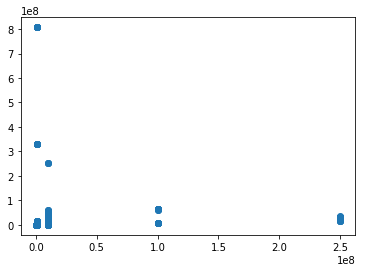

In [12]:
plt.scatter(lprEst.ConLoading, lprEst.PosRec)